In [1]:
import keras

from keras.applications.mobilenet_v2 import MobileNetV2

from keras import models
from keras import layers

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

import matplotlib.pyplot as plt

import numpy as np

Using TensorFlow backend.


In [2]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

def show_history(history):
    acc = smooth_curve(history.history['acc'])
    val_acc = smooth_curve(history.history['val_acc'])
    loss = smooth_curve(history.history['loss'])
    val_loss = smooth_curve(history.history['val_loss'])

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title("Training and Validation accuracy")
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title("Training and Validation loss")
    plt.legend()

    plt.show()

base_dir = 'C:/Taeuk/HumanPoseDetectDatasets/'
train_dir = base_dir+'train'
test_dir = base_dir+'test'
validation_dir = base_dir+'validation'

model_path = "C:/jupyter/checkpoints/{epoch:02d}-{val_loss:.4f}.hdf5"
cb_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=model_path, 
    monitor='val_loss',
    verbose=1, 
    save_best_only=True)

In [3]:
def set_trainable(conv_base, flag):
    if flag == '0':
        conv_base.trainable = False
    else:
        conv_base.trainable = True
        set_trainable = False
        for layer in conv_base.layers:
            if layer.name == flag:
                set_trainable = True
            if set_trainable:
                layer.trainable = True
            else:
                layer.trainable = False
            print(layer.trainable)
            
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [4]:
conv_base = keras.applications.xception.Xception(
    weights='imagenet', 
    input_shape=(299, 299, 3),
    include_top=False,
    classes=6,
)
ref = keras.applications.xception.Xception()

conv_base.summary()
ref.summary()

for layer in ref.layers:
    print(layer.name)

W1109 23:06:25.501652 17676 deprecation_wrapper.py:119] From C:\Users\User24\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1109 23:06:25.516648 17676 deprecation_wrapper.py:119] From C:\Users\User24\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1109 23:06:25.519637 17676 deprecation_wrapper.py:119] From C:\Users\User24\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1109 23:06:25.538636 17676 deprecation_wrapper.py:119] From C:\Users\User24\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1109 23:06:25.539624 17676 deprecation_wrapper.py:1

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [5]:
set_trainable(conv_base, 'block14_sepconv2')

XCEPTION = models.Sequential()
XCEPTION.add(conv_base)
XCEPTION.add(layers.GlobalAveragePooling2D())
XCEPTION.add(layers.Dense(6, activation='sigmoid'))

XCEPTION.summary()

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 10, 10, 2048)      20861480  
_____________

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299), #
    batch_size=20,
    class_mode='categorical'
    
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(299, 299), #
    batch_size=20,
    class_mode='categorical'
)

XCEPTION.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc']
)
history = XCEPTION.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2,
    callbacks=[cb_checkpoint]
)

Found 1362 images belonging to 6 classes.
Found 77 images belonging to 6 classes.


W1109 23:06:38.908930 17676 deprecation_wrapper.py:119] From C:\Users\User24\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1109 23:06:38.984897 17676 deprecation.py:323] From C:\Users\User24\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
 - 1139s - loss: 1.2375 - acc: 0.7455 - val_loss: 0.9937 - val_acc: 0.6255

Epoch 00001: val_loss improved from inf to 0.99375, saving model to C:/jupyter/checkpoints/01-0.9937.hdf5
Epoch 2/50
 - 1121s - loss: 0.5735 - acc: 0.9220 - val_loss: 0.6150 - val_acc: 0.7929

Epoch 00002: val_loss improved from 0.99375 to 0.61498, saving model to C:/jupyter/checkpoints/02-0.6150.hdf5
Epoch 3/50
 - 1118s - loss: 0.3358 - acc: 0.9406 - val_loss: 0.4585 - val_acc: 0.8185

Epoch 00003: val_loss improved from 0.61498 to 0.45845, saving model to C:/jupyter/checkpoints/03-0.4585.hdf5
Epoch 4/50
 - 1123s - loss: 0.2064 - acc: 0.9625 - val_loss: 0.3961 - val_acc: 0.8439

Epoch 00004: val_loss improved from 0.45845 to 0.39605, saving model to C:/jupyter/checkpoints/04-0.3961.hdf5
Epoch 5/50
 - 1117s - loss: 0.1632 - acc: 0.9635 - val_loss: 0.3456 - val_acc: 0.8828

Epoch 00005: val_loss improved from 0.39605 to 0.34562, saving model to C:/jupyter/checkpoints/05-0.3456.hdf5
Epoch 6/50
 - 1125s

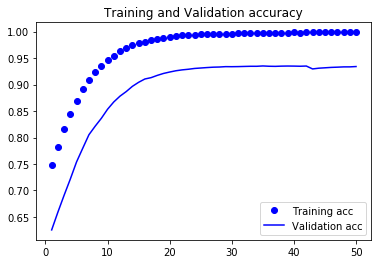

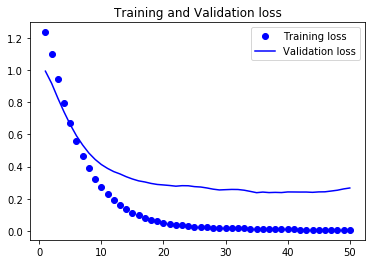

In [7]:
show_history(history)

In [8]:
XCEPTION_json = XCEPTION.to_json()
with open("Xception.json", 'w') as json_file:
    json_file.write(XCEPTION_json)